In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.lines as lines
%matplotlib inline

In [439]:
def hIndex(df, m):
    reactions = sorted(df[df['User ID'] == m]['Reactions'],reverse=True)
    hInd = 0
    for i in range(0,len(reactions)):
        if (i+1 > reactions[i]):
            break
        else:
            hInd = i+1
    return(hInd)

In [440]:
df_feed = pd.read_csv('data/feed.csv',encoding='latin_1')
df_members = pd.read_csv('data/member.csv')

ag_rep = {'.gov.sg':'', '.edu.sg':'','.com.sg':'','bmsi.':'','scei.':'','.mobi':'','cscollege':'csc','tech':'govtech',
          'iesingapore':'ie','pris':'prisons','defence':'mindef','a-star':'a*star','schools':'moe','sentosa':'sdc'}

orgs = {'OoS':['agc','agd', 'ago','supcourt','statecourts','psd','parl','fjcourts',],'others':['wshi'],'MFA':['mfa'],
        'MLAW':['sla','mlaw','ipos'],'MEWR':['pub','nea','mewr'],
        'MTI': ['a*star','stb','spring','singstat','sdc','mti','jtc','ie','ema','edb',],
        'MOF': ['acra','vital','toteboard','mof','iras','customs','cp2m',],'MSF':['ncss','msf'],
        'MOM':['wsg','mom','cpf',],'MCI':['nlb','mci','imda'],'MOT':['mpa','mot','lta','caas'],
        'MND':['ura','nparks','mnd','hdb','cea','bca','ava'],'MOH':['moh','hsa','hpb'],
        'MOE':['ssg','tp','sp','seab','rp','nyp','np','moe','ite','ial','cpe'],
        'PMO':['pmo','govtech','nrf','mas','csc','csa'],'MCCY':['sport','pgo','pa','nyc','nhb','nac','muis','mccy'],
        'MHA':['spf','score','scdf','prisons','mha','ica','cra','cnb'],'MINDEF':['mindef','dsta']}
df_org = pd.DataFrame(columns=['Parent'])
for key, value in orgs.items():
    for v in value:
        df_org.loc[v.upper()] = key
df_members['Agency'].replace(ag_rep, regex=True,inplace=True)
df_members['Agency'] = df_members['Agency'].str.upper()

df_members = pd.merge(df_members,df_org,how='left',left_on='Agency',right_index=True)
df_feed = pd.merge(df_feed, df_members)

In [441]:
members = df_feed['User ID'].unique()
df_feed_stats = pd.DataFrame(index = list(members))
for index,row in df_feed_stats.iterrows():
    df_feed_stats.loc[index,'h'] = hIndex(df_feed,index)
    df_feed_stats.loc[index,'Posts'] = len(df_feed[df_feed['User ID'] == index])
    df_feed_stats.loc[index,'Reactions'] = sum(df_feed[df_feed['User ID'] == index]['Reactions'])
df_feed_stats = pd.merge(df_feed_stats, df_members, how='left',left_index=True,right_on='User ID')
df_feed_stats = df_feed_stats[df_feed_stats['h']>0]
df_feed_stats = df_feed_stats.sort_values(['h','Reactions'],ascending=False)

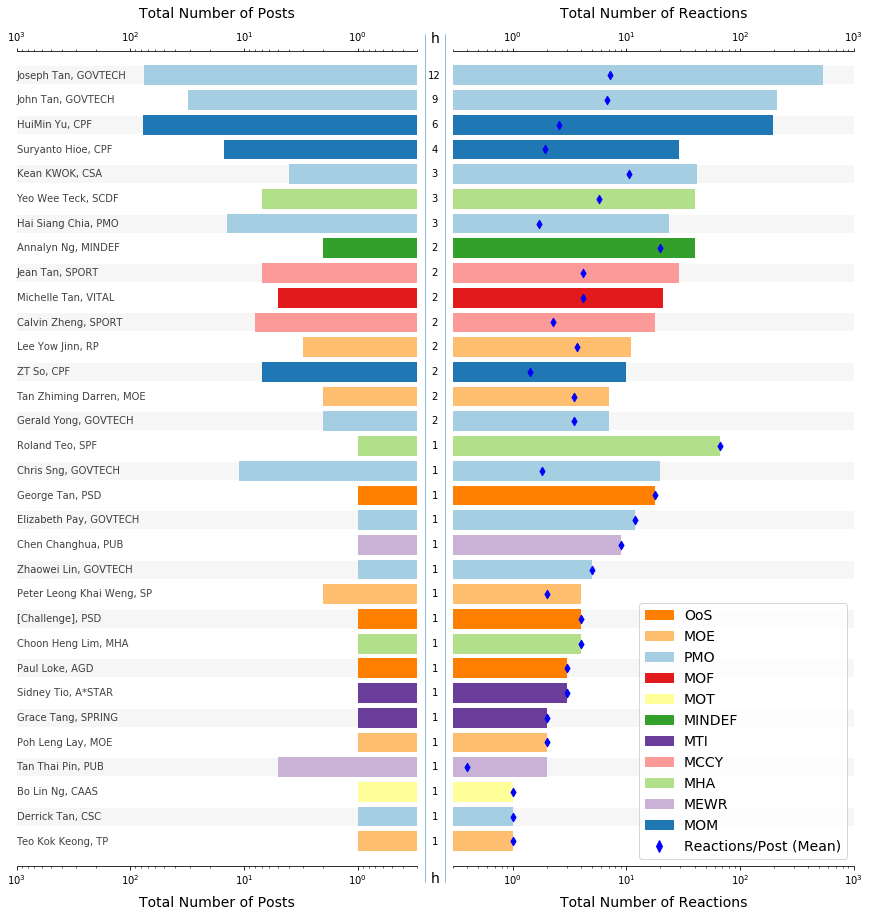

In [442]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.09)
ax1 = fig.add_subplot('121')
ax2 = fig.add_subplot('122')

cmap=mpl.cm.Paired
_1 = list(df_feed_stats['Parent'].unique())
norm = mpl.colors.Normalize(0,len(_1))
_2=dict(zip(_1,[norm(x) for x in range(len(_1))]))
colours = [cmap(_2[x]) for x in list(df_feed_stats['Parent'])]

lpatches = [mpatches.Patch(color=cmap(_2[x]), label=x) for x in set(list(df_feed_stats['Parent']))]
blue_marker = lpatches.append(lines.Line2D([], [], color='blue', marker='d', lw=0, markersize=8, 
                                           label='Reactions/Post (Mean)'))
plt.legend(handles=lpatches,prop={'size':14})

ax1.barh(range(len(df_feed_stats)),df_feed_stats['Posts'],color=colours,alpha=1,zorder=5)
ax2.barh(range(len(df_feed_stats)),df_feed_stats['Reactions'],color=colours, alpha=1,zorder=5)
ax2.scatter(df_feed_stats['Reactions']/df_feed_stats['Posts'], range(len(df_feed_stats)), 
            marker='d',color='blue',zorder=10)

ax1.invert_yaxis()
ax1.invert_xaxis()
ax2.invert_yaxis()
ax1.set_ylim(32,-1)
ax2.set_ylim(32,-1)
ax1.set_xlim(1000,0.3)
ax2.set_xlim(0.3,1000)
ax1.set_xscale('Log')
ax2.set_xscale('Log')
ax1.tick_params(axis='y',which='both',left='off',labelleft='off')
ax2.tick_params(axis='y',which='both',left='off',labelleft='off')
ax1.tick_params(axis='x',which='both',top='on',labeltop='on')
ax2.tick_params(axis='x',which='both',top='on',labeltop='on')

major_ticks = np.arange(0, 32, 2)
ax1.set_yticks(major_ticks)
ax2.set_yticks(major_ticks)
ax1.grid(True, axis='y', which='both',lw=18,alpha=0.1,zorder=0)
ax2.grid(True, axis='y', which='both',lw=18,alpha=0.1,zorder=0)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.text(0.5, 1.04, 'Total Number of Posts',horizontalalignment='center',fontsize=14,transform = ax1.transAxes)
plt.text(0.5, 1.04, 'Total Number of Reactions',horizontalalignment='center',fontsize=14,transform = ax2.transAxes)
plt.text(1.045, 1.01, 'h',horizontalalignment='center',fontsize=14,transform = ax1.transAxes)
plt.text(0.5, -0.05, 'Total Number of Posts',horizontalalignment='center',fontsize=14,transform = ax1.transAxes)
plt.text(0.5, -0.05, 'Total Number of Reactions',horizontalalignment='center',fontsize=14,transform = ax2.transAxes)
plt.text(1.045, -0.02, 'h',horizontalalignment='center',fontsize=14,transform = ax1.transAxes)

l1 = lines.Line2D([1.02, 1.02], [-0.02, 1.02], transform=ax1.transAxes,lw=0.5)
l2 = lines.Line2D([1.07, 1.07], [-0.02, 1.02], transform=ax1.transAxes,lw=0.5)
fig.lines.extend([l1,l2])

for y in range(len(df_feed_stats)):      
    ax1.annotate('{0:0.0f}'.format(df_feed_stats.iloc[y]['h']),xy = (0.3,y), xytext=(0.21,y),
                 horizontalalignment='center', verticalalignment='center')
    ax1.annotate(df_feed_stats.iloc[y]['Name'] + ', ' + df_feed_stats.iloc[y]['Agency'], xy = (1000,y), xytext=(1000,y),
                 alpha=0.75, horizontalalignment='left', verticalalignment='center')